In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Use `engine.execute` to select and display the first 10 rows
engine.execute('SELECT * FROM measurement order by id desc ').fetchall()

[(19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (19545, 'USC00516128', '2017-08-18', None, 76.0),
 (19544, 'USC00516128', '2017-08-17', 0.13, 72.0),
 (19543, 'USC00516128', '2017-08-16', 0.42, 71.0),
 (19542, 'USC00516128', '2017-08-15', 0.42, 70.0),
 (19541, 'USC00516128', '2017-08-14', 0.22, 79.0),
 (19540, 'USC00516128', '2017-08-13', None, 80.0),
 (19539, 'USC00516128', '2017-08-12', 0.14, 74.0),
 (19538, 'USC00516128', '2017-08-11', None, 72.0),
 (19537, 'USC00516128', '2017-08-10', 0.07, 75.0),
 (19536, 'USC00516128', '2017-08-09', 0.15, 71.0),
 (19535, 'USC00516128', '2017-08-08', 0.34, 74.0),
 (19534, 'USC00516128', '2017-08-07', 0.05, 78.0),
 (19533, 'USC00516128', '2017-08-06', None, 79.0),
 (19532, 'USC00516128', '2017-08-05', None, 77.0),
 (19531, 'USC00516128', '2017-08

In [11]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Use `engine.execute` to select and display the rows
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

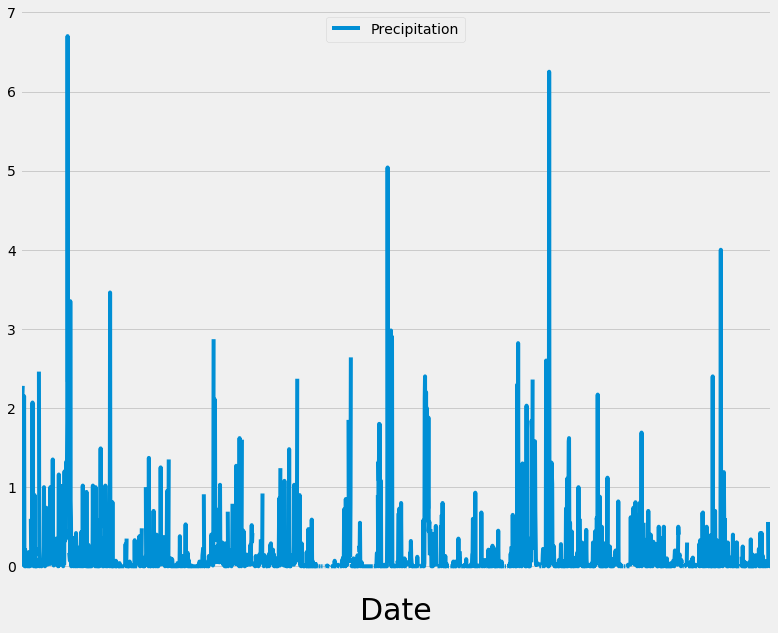

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = engine.execute("select date, prcp from measurement where date >= '2016-08-23' ").fetchall()
# Unpack the `date` and `prcp` from results and save into separate lists
date_results = [result[0] for result in results]
prcp_results = [result[1] for result in results]
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame({'Date' : date_results, 'Precipitation': prcp_results}).set_index('Date').sort_index(ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(figsize=(12,10))
plt.xlabel('Date', fontsize=30)
plt.xticks([])
plt.legend(loc='upper center')
plt.savefig("Output/Precipitation.png")
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
num_stations = len(engine.execute("select count(station) from measurement group by station").fetchall())
print(f"There are {num_stations} available stations in this dataset.")

There are 9 available stations in this dataset.


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = engine.execute("select station, count(date) from measurement group by station order by count(date) desc").fetchall()
act_station = station_counts[0][0]
act_station_count = station_counts[0][1]
print(f'The most activate station is {act_station} with {act_station_count} observations.')


The most activate station is USC00519281 with 2772 observations.


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
satation_info =[]
min = engine.execute("select station, min(tobs), date from measurement").fetchall()
max = engine.execute("select station, max(tobs), date from measurement").fetchall()
avg = engine.execute("select round(avg(tobs), 2) from measurement").fetchall()

print(f'The lowest temperature recorded was {min[0][1]}, at the {min[0][0]} location, recorded on {min[0][2]}.')
print(f'The lowest temperature recorded was {max[0][1]}, at the {max[0][0]} location, recorded on {max[0][2]}.')
print(f'The average temperature for the most activate stations is {avg[0][0]}.')

The lowest temperature recorded was 53.0, at the USC00511918 location, recorded on 2013-04-02.
The lowest temperature recorded was 87.0, at the USC00519397 location, recorded on 2010-08-23.
The average temperature for the most activate stations is 73.1.


In [18]:
engine.execute("select station, count(tobs) from measurement group by station order by count(tobs) desc").fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
engine.execute("select * from measurement where station = 'USC00519281' order by date desc").fetchall()

[(14959, 'USC00519281', '2017-08-18', 0.06, 79.0),
 (14958, 'USC00519281', '2017-08-17', 0.01, 76.0),
 (14957, 'USC00519281', '2017-08-16', 0.12, 76.0),
 (14956, 'USC00519281', '2017-08-15', 0.32, 77.0),
 (14955, 'USC00519281', '2017-08-14', 0.0, 77.0),
 (14954, 'USC00519281', '2017-08-13', 0.0, 77.0),
 (14953, 'USC00519281', '2017-08-06', 0.0, 83.0),
 (14952, 'USC00519281', '2017-08-05', 0.06, 82.0),
 (14951, 'USC00519281', '2017-08-04', 0.0, 77.0),
 (14950, 'USC00519281', '2017-07-31', 0.0, 76.0),
 (14949, 'USC00519281', '2017-07-30', 0.0, 81.0),
 (14948, 'USC00519281', '2017-07-29', 0.23, 82.0),
 (14947, 'USC00519281', '2017-07-28', 0.09, 81.0),
 (14946, 'USC00519281', '2017-07-27', 0.01, 76.0),
 (14945, 'USC00519281', '2017-07-26', 0.12, 75.0),
 (14944, 'USC00519281', '2017-07-25', 0.11, 77.0),
 (14943, 'USC00519281', '2017-07-24', 0.61, 75.0),
 (14942, 'USC00519281', '2017-07-23', 0.2, 82.0),
 (14941, 'USC00519281', '2017-07-22', 0.2, 77.0),
 (14940, 'USC00519281', '2017-07-21', 0

In [20]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [22]:
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date

('2017-08-23')

In [23]:
dt.date(2017, 8, 23) - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

##### Using engine.execute and sql query

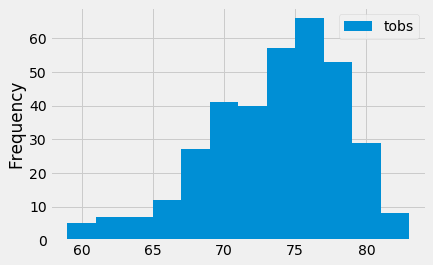

In [24]:
# Choose the station with the highest number of temperature observations.
#engine.execute("select station, count(tobs) from measurement group by station order by count(tobs) desc").fetchall()
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prep_results = engine.execute("select date, tobs from measurement where date between '2016-08-23' and '2017-8-23' and station = 'USC00519281'").fetchall()
df1 = pd.DataFrame({'Date': [result[0] for result in prep_results], 'tobs':[result[1] for result in prep_results]}).\
set_index('Date').sort_index(ascending=True)

#Plot dataframe
ax = df1.plot(kind='hist', bins=12)
plt.legend(loc='upper right')
plt.savefig("Output/tobs_frequency_chart.png")
plt.show()

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results = calc_temps('2017-07-02', '2017-07-08')
trip_results

[(71.0, 78.11904761904762, 87.0)]

##### Temperature Analysis (Optional)
The function calc_temps accepts a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
Using the calc_temps function calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
Plot the min, avg, and max temperature from your previous query as a bar chart.
Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

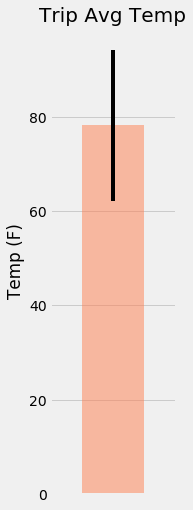

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(2,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.savefig("Output/TripTempSummary.png")
plt.show()

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def precipitation(start_date, end_date):
    
        # Docstring for the function `calc_temps`
    """Precipitation information per weather station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        A list of tuples containing precipitation amount, station, name, latitude, longitude, and elevation in descending order.
    """
    
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(precipitation('2017-07-02','2017-07-08'))

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.5), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.15), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.05), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, None), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, None)]


In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-07-01'
end_date ='2017-07-08'
# Use the start and end date to create a range of dates

dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()

# List comprehension to get the elements in the tuple from the dates query 
trip_dates = [x[0] for x in dates]

# Stip off the year and save a list of %m-%d strings with another list comprehension 
trip_dates_stripped= [x[5:] for x in trip_dates]

# Find the start month/day and the end month/day 
start_month_day = trip_dates_stripped[0]
end_month_day = trip_dates_stripped[-1]


#daily_normals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()]
    
# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Aggregate Daily Normals for 07-01 to 07-08")
daily_normals

Aggregate Daily Normals for 07-01 to 07-08


[(67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0),
 (69.0, 76.08333333333333, 83.0)]

In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


# Create a dataframe from the previous query 
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])

# Add trip_dates to Pandas DataFrame
daily_normals_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,tmin,tavg,tmax
date,,,
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0
2017-07-06,69.0,75.000000,81.0
2017-07-07,69.0,74.910714,82.0
2017-07-08,69.0,76.083333,83.0


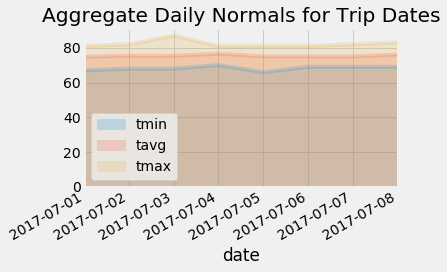

In [32]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals for Trip Dates")
plt.tight_layout()
plt.savefig("Output/DailyNormalTemps.png")
plt.show()